In [2]:
#same as previous
import cv2
from matplotlib import pyplot as plt

def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()

def plt_show0(img):
    b,g,r = cv2.split(img)
    img = cv2.merge([r, g, b])
    plt.imshow(img)
    plt.show()
    
def plt_show(img):
    plt.imshow(img,cmap='gray')
    plt.show()

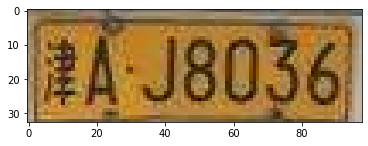

In [3]:
# load
rawImage = cv2.imread("./car_license/test4.png")
plt_show0(rawImage)

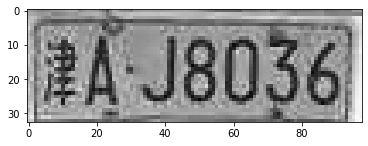

In [4]:
# gray
image = rawImage.copy()
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt_show(gray_image)

# Seg characters
## task：Eliminate the effects of boundaries and nails of the plate

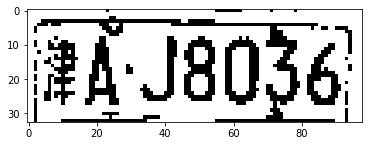

In [5]:
# Binarize
ret, image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU)
plt_show(image)

In [6]:
image.shape 
rows = image.shape[0]
cols = image.shape[1]
print(rows,cols)

33 98


In [7]:
# Count the black value(0) of each rows
hd = []
for row in range(rows):
    res = 0
    for col in range(cols):
        if image[row][col] == 0:
            res = res+1
    hd.append(res)
len(hd)
max(hd)

62

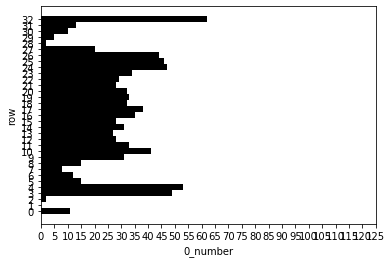

In [8]:
# Plot the histogram
y = [y for y in range(rows)]
x = hd
plt.barh(y,x,color='black',height=1)
# Set axis
plt.xlabel('0_number')
plt.ylabel('row')
# set precision
plt.xticks([x for x in range(0,130,5)])
plt.yticks([y for y in range(0,rows,1)])

plt.show()

### The area between two trough is the region we want。

In [9]:
x = range(int(rows/2),2,-1)
x = [*x]
x

[16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3]

In [10]:
# Finding trough
mean = sum(hd[0:int(rows/2)])/(int(rows/2)+1)
mean
region = []
for i in range(int(rows/2),2,-1): # Starting from row three since the first two rows are clearly boundries
    if hd[i]<mean:
        region.append(i)
        break
for i in range(int(rows/2),rows): # Starting from row three since the first two rows are clearly boundries
    if hd[i]<mean:
        region.append(i)
        break
region

[8, 27]

In [11]:
image1 = image[region[0]:region[1],:] # using the row number

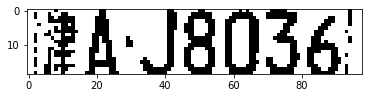

In [12]:
plt_show(image1)

# Segment in vertical direction

In [13]:
image11 = image1.copy()

In [14]:
image11.shape 
rows = image11.shape[0]
cols = image11.shape[1]
print(rows,cols)

19 98


In [15]:
cols 

98

In [16]:
# Binarize to count 0 value
hd1 = []
for col in range(cols):
    res = 0
    for row in range(rows):
        if image11[row][col] == 0:
            res = res+1
    hd1.append(res)
len(hd1)
max(hd1)

18

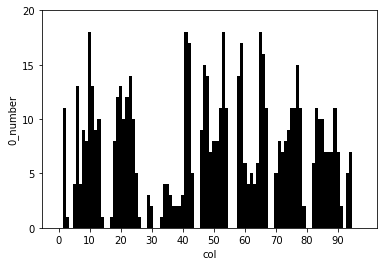

In [17]:
# Histogram
y = hd1 # spot number
x = [x for x in range(cols)] # column number
plt.bar(x,y,color='black',width=1)
# x,y axis
plt.xlabel('col')
plt.ylabel('0_number')
# precision
plt.xticks([x for x in range(0,cols,10)])
plt.yticks([y for y in range(0,max(hd1)+5,5)])

plt.show()

In [18]:
mean = sum(hd1)/len(hd1)
mean

6.448979591836735

In [19]:
# Simple filter
for i in range(cols):
    if hd1[i] < mean/4:
        hd1[i] = 0

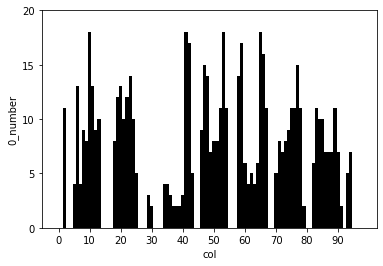

In [20]:
# Same logic as above
y = hd1 
x = [x for x in range(cols)] 
plt.bar(x,y,color='black',width=1)
plt.xlabel('col')
plt.ylabel('0_number')
plt.xticks([x for x in range(0,cols,10)])
plt.yticks([y for y in range(0,max(hd1)+5,5)])

plt.show()

### we can clearly see some trough crest

In [33]:
# list all col
region1 = []
reg = []
for i in range(cols-1):
    if hd1[i]==0 and hd1[i+1] != 0:
        reg.append(i)
    if hd1[i]!=0 and hd1[i+1] == 0:
        reg.append(i+2)
    if len(reg) == 2:
        if (reg[1]-reg[0])>5: # make the len larger than 5
            region1.append(reg) 
            reg = []
        else:
            reg = []
region1

[[4, 15], [17, 27], [33, 45], [45, 56], [57, 69], [69, 81], [81, 93]]

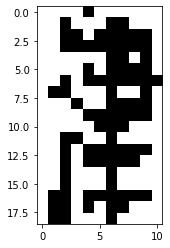

In [34]:
# test
image2 = image1[:,region1[0][0]:region1[0][1]]
plt_show(image2)

In [35]:
import numpy as np
white = []
for i in range(rows*2):
    white.append(255)
white = np.array(white)
white = white.reshape(rows,2)
white.shape

(19, 2)

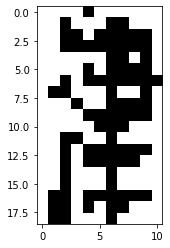

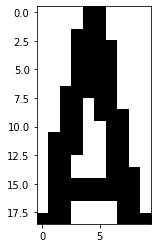

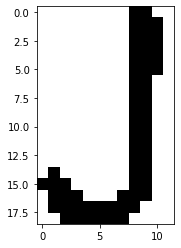

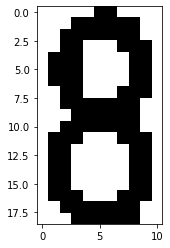

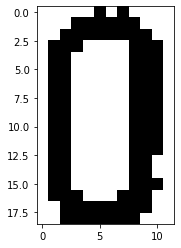

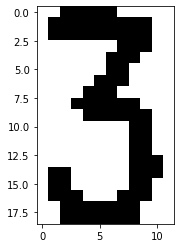

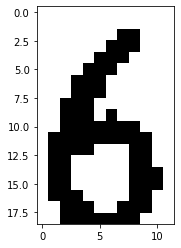

In [36]:
#  Loop though all the area
p = []
for r in region1:
    r = image1[:,r[0]:r[1]]
    plt_show(r)
    p.append(r)
    p.append(white)
    

In [37]:
# collage pictures
image2 = np.hstack(p)

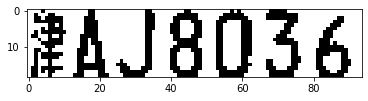

In [38]:
plt_show(image2)

In [39]:
# save individual char into folder
print(region)
print(region1)

[8, 27]
[[4, 15], [17, 27], [33, 45], [45, 56], [57, 69], [69, 81], [81, 93]]


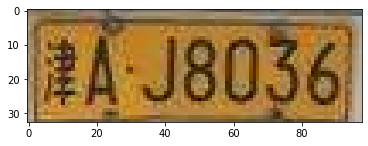

In [40]:
plt_show0(rawImage)

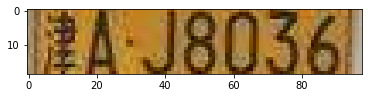

In [41]:
v_image = rawImage[region[0]:region[1],:]
plt_show0(v_image)

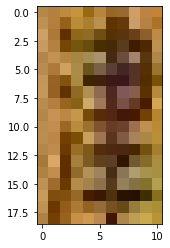

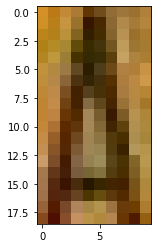

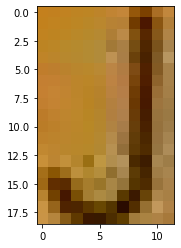

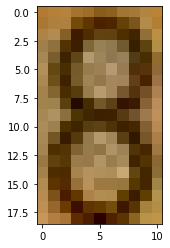

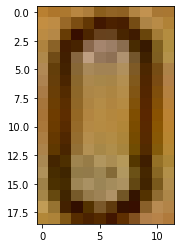

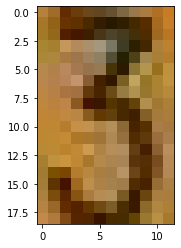

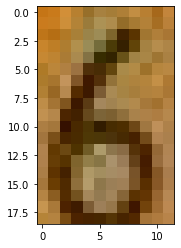

In [43]:
i = 1
for reg in region1:
    h_image = v_image[:,reg[0]:reg[1]]
    plt_show0(h_image)
    cv2.imwrite('./words/test4_'+str(i)+'.png', h_image)
    i = i+1

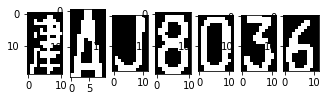

In [44]:
word_images = []
for i in range(1,8):
    word =  cv2.imread('./words/test4_'+str(i)+'.png',0)
    ret, word = cv2.threshold(word, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    word_images.append(word)
word_images
plt.imshow(word_images[0],cmap='gray')    
for i,j in enumerate(word_images):  
    plt.subplot(1,8,i+1)
    plt.imshow(word_images[i],cmap='gray')
plt.show()